# ch05.07. 기초모델 구현 - Logistic Regression
---
* 날짜:
* 이름:

## 학습내용
    - 로지스틱 회귀 프로세스에 대해 이해한다
    - 시그모이드 함수를 구현한다

```
import numpy as np
import matplotlib.pyplot as plt
```

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## 클래스 작성
---

In [1]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression()

In [58]:
model = LogisticRegressionGD()
model.init_weights(X_train)
for xi, yi in zip(X_train[:5], y_train[:5]):
    y_model = model.model(xi)
    y_hat = model.sigmoid(y_model)
    print(y_model, y_hat, yi)
    print(model.w)
#     self.w[:-1] += self.lr*(y_hat-yi)*xi
#     self.w[-1] += self.lr*(y_hat-yi)  # bias(b) 값

0.061811140968132644 0.5154478671896677 0
[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
0.04696818780674092 0.5117398888376984 1
[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
0.06164004719771855 0.5154051344634601 0
[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
0.057652260840841615 0.514409074378028 0
[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
0.052760409861189905 0.5131870435857977 0
[ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]


In [102]:
class LogisticRegressionGD():

    def __init__(self, lr=0.001, random_state=1):
        self.lr=lr
        self.seed = np.random.RandomState(random_state)

    def init_weights(self, X):
        size = X.shape[1]
        self.w = self.seed.normal(0,0.01, size = size+1)   # np.random.normal(location(위치), 편차, size = size)

    def model(self, X):
        return np.dot(X, self.w[:-1]) + self.w[-1]
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def predict(self, X):
        y_hat = self.model(X)
        y_hat = self.sigmoid(y_hat)
        logit = np.where(y_hat >= 0.5, 1, 0)
        return logit
    
    def evaluate(self, X, y):
        y_model = self.model(X)
        y_hat = self.sigmoid(y_model)
        
        loss = self.loss(y,y_hat)
        loss = loss.sum()/len(y)
        acc = self.accuracy(y,y_hat)
        return loss, acc
    
    def loss(self, y, y_hat):
        loss = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
        N = len(loss)
        L = -np.sum(loss)/N
        return L
    
    def accuracy(self, y, y_logit):
        return np.count_nonzero(y==y_logit)/len(y)
    
    def fit(self, X, y, epochs=10, show_params=False):
        self.init_weights(X)
        self.history=dict(loss=[], acc=[])
        N = X.shape[0]
        
        for epoch in range(epochs):
            # 최적화
            y_model = self.model(X)
            y_hat = self.sigmoid(y_model)

            np.dot(X.T , (y-y_hat))
            self.w[:-1] += self.lr*np.dot(X.T , (y_hat-y))/N
            self.w[-1] += self.lr*np.sum(y_hat-y)/N  # bias(b) 값
            
            # 평가 및 결과 저장
            loss, acc = self.evaluate(X, y)
            self.history['loss'].append(loss)
            self.history['acc'].append(acc)
            print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
            if show_params: print(self.w)
    
    # 데이터 흐름 시각화
    def draw_dflow(self, X, y, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)

        y_model = self.model(X)
        y_hat = self.sigmoid(y_model)
        y_pred = self.predict(X)
        
        plt.plot(y, label='y', marker='o')
        plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
        plt.plot(y_pred, label='$\logt$', marker='.', linestyle='--')
        plt.legend()
        plt.show()

    # 학습 곡선 시각화
    def draw_lcurve(self, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(self.history['acc'], label='acc', marker='o')
        plt.plot(self.history['loss'], label='loss', marker='o')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

## iris 데이터로 분류 진행
---

### **데이터 로드**

In [103]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def iris_loader(c_1, c_not1, test_size=0.2, rs=1):
    iris = load_iris()
    X = iris.data
    y = iris.target

    X = X[y!=2]
    y = y[y!=2]
    y = np.where(y==1, c_1, c_not1)
    print(X.shape, y.shape, X[0], y[0])

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

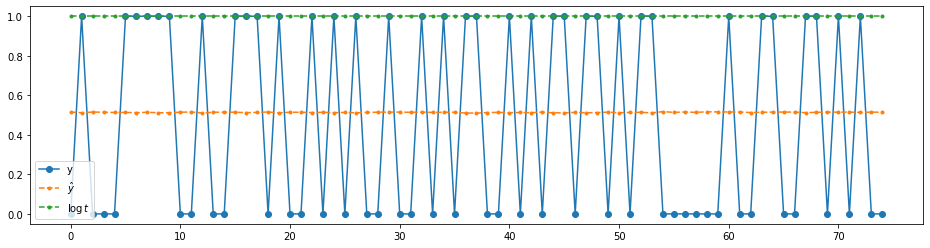

In [104]:
model = LogisticRegressionGD(lr=0.0001)

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습**

In [105]:
history = model.fit(X_train, y_train, epochs=10)

[Epoch 0] loss: 0.01  acc: 0.0
[Epoch 1] loss: 0.01  acc: 0.0
[Epoch 2] loss: 0.01  acc: 0.0
[Epoch 3] loss: 0.01  acc: 0.0
[Epoch 4] loss: 0.01  acc: 0.0
[Epoch 5] loss: 0.01  acc: 0.0
[Epoch 6] loss: 0.01  acc: 0.0
[Epoch 7] loss: 0.01  acc: 0.0
[Epoch 8] loss: 0.01  acc: 0.0
[Epoch 9] loss: 0.01  acc: 0.0


### **학습 후 성능평가**

성능:  (0.009393357667904282, 0.0)


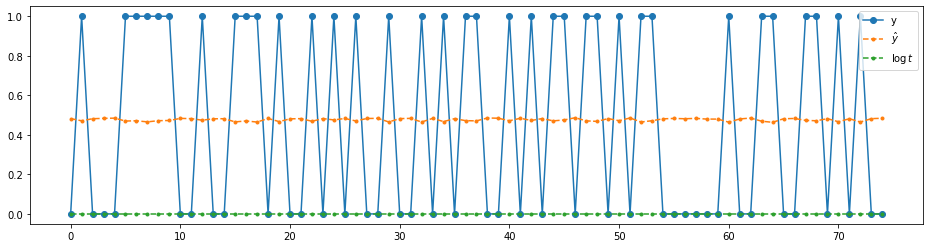

In [106]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **테스트셋 성능평가**

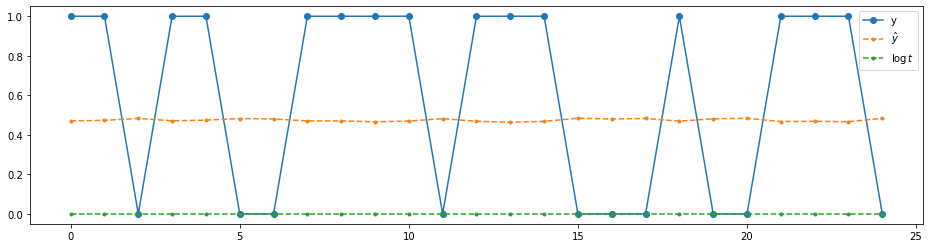

In [107]:
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **학습곡선**

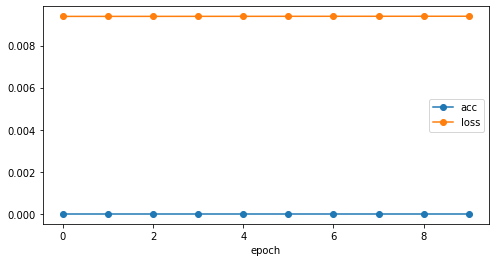

In [108]:
model.draw_lcurve()

### **하이퍼파라미터에 따른 성능평가**

In [110]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    model = LogisticRegressionGD(lr=lr)
    history = model.fit(X_train, y_train, epochs=10)
    print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.01  acc: 0.0
[Epoch 1] loss: 0.01  acc: 0.0
[Epoch 2] loss: 0.01  acc: 0.0
[Epoch 3] loss: 0.01  acc: 0.0
[Epoch 4] loss: 0.01  acc: 0.0
[Epoch 5] loss: 0.01  acc: 0.0
[Epoch 6] loss: 0.01  acc: 0.0
[Epoch 7] loss: 0.01  acc: 0.0
[Epoch 8] loss: 0.01  acc: 0.0
[Epoch 9] loss: 0.01  acc: 0.0
===== lr 1e-05 ==== (0.027597228080367273, 0.0)
[Epoch 0] loss: 0.01  acc: 0.0
[Epoch 1] loss: 0.01  acc: 0.0
[Epoch 2] loss: 0.01  acc: 0.0
[Epoch 3] loss: 0.01  acc: 0.0
[Epoch 4] loss: 0.01  acc: 0.0
[Epoch 5] loss: 0.01  acc: 0.0
[Epoch 6] loss: 0.01  acc: 0.0
[Epoch 7] loss: 0.01  acc: 0.0
[Epoch 8] loss: 0.01  acc: 0.0
[Epoch 9] loss: 0.01  acc: 0.0
===== lr 0.0001 ==== (0.027618146830974653, 0.0)
[Epoch 0] loss: 0.01  acc: 0.0
[Epoch 1] loss: 0.01  acc: 0.0
[Epoch 2] loss: 0.01  acc: 0.0
[Epoch 3] loss: 0.01  acc: 0.0
[Epoch 4] loss: 0.01  acc: 0.0
[Epoch 5] loss: 0.01  acc: 0.0
[Epoch 6] loss: 0.01  acc: 0.0
[Epoch 7] loss: 0.01  acc: 0.0
[Epoch 8] loss: 0.01  acc: 0.0
[Epo